In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.cluster import (
    KMeans,
    AffinityPropagation,
    MeanShift,
    AgglomerativeClustering,
    DBSCAN,
    estimate_bandwidth
)
from sklearn.preprocessing import StandardScaler

In [3]:
file = pd.read_csv("s1.txt", delimiter="    ", header = None, names = ["x", "y"])

C:\Users\nikit\AppData\Local\Temp\ipykernel_19116\3676094884.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv("s1.txt", delimiter="    ", header = None, names = ["x", "y"])


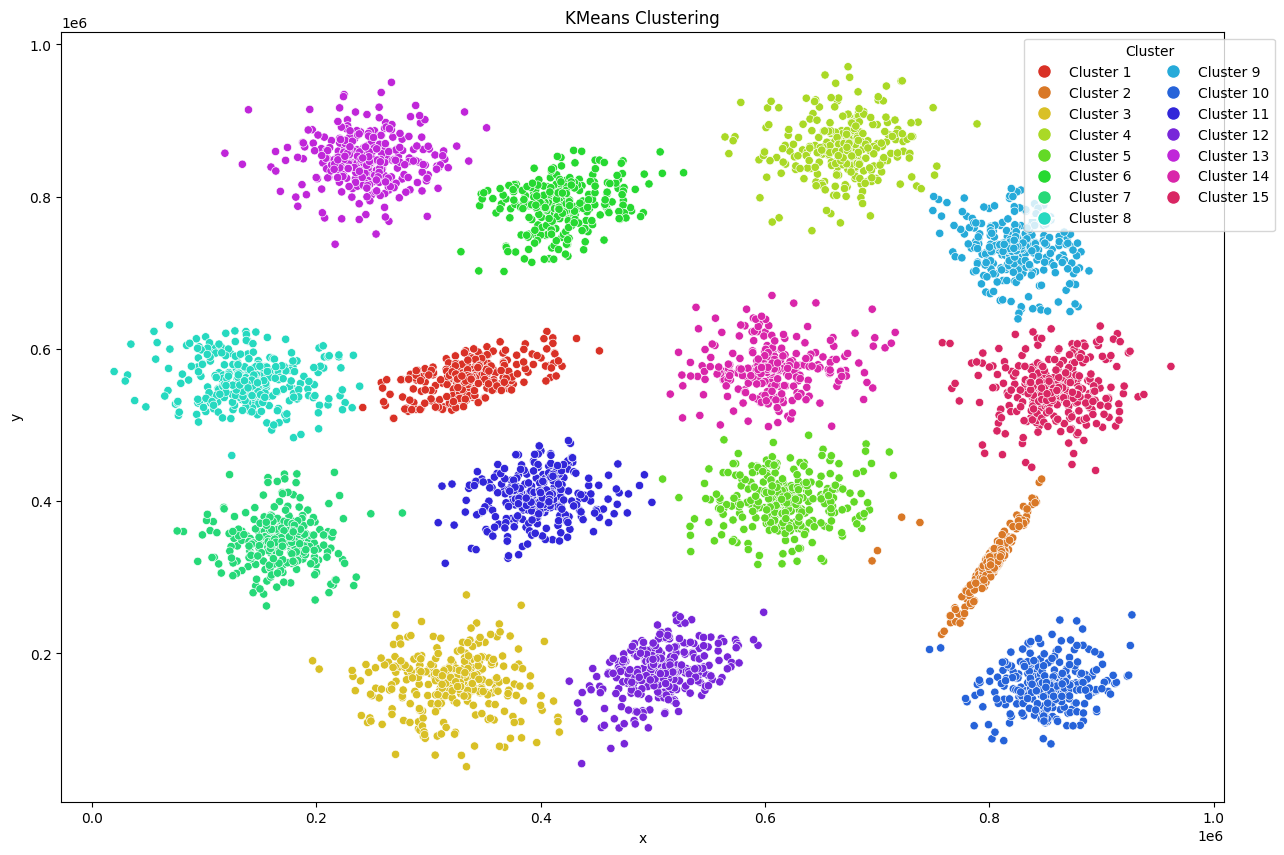

In [4]:
X = file.copy()
kmeans = KMeans(n_clusters=15)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(15, 10))
plt.title("KMeans Clustering")
plt.xlabel("x")
plt.ylabel("y")

palette = sns.color_palette(sns.hls_palette(15, l=.5, s=.7))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette=palette)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i+1}", markerfacecolor=palette[i], markersize=10) for i in range(15)]
plt.legend(handles=legend_handles, title="Cluster", loc="upper right", bbox_to_anchor=(1.05, 1), ncol=2, prop={"size": 10})
plt.show()

           X          Y
0  91.812578  89.436650
1  85.004969  55.455268
2   7.994185  14.516603
3  96.701518  43.632154
4  98.810685  18.851801
5  12.502310  82.096048
6  23.172439  30.250504
7  76.478640  13.574177
8  52.112530  88.394151
9  19.399128  51.629851


C:\Users\nikit\AppData\Local\Temp\ipykernel_19116\934367328.py:33: UserWarning: The palette list has more values (15) than needed (10), which may not be intended.
  sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette=palette)


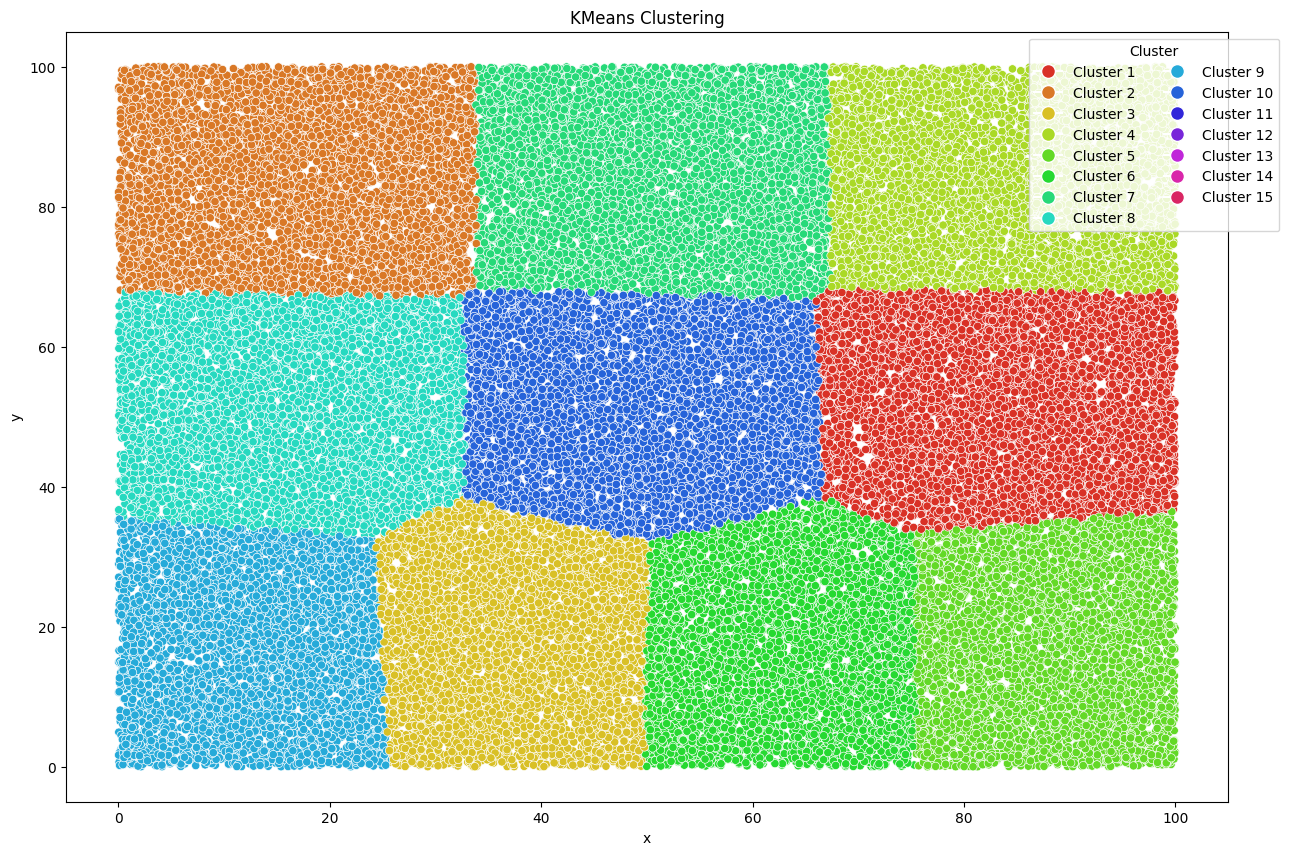

In [5]:
def generate_uniform_dataset(n_samples=5000, x_range=(0, 100), y_range=(0, 100)):
    """
    Генерирует датасет с координатами, равномерно распределёнными в заданном диапазоне.

    :param n_samples: Количество точек в датасете.
    :param x_range: Диапазон значений для координаты X (кортеж из двух чисел).
    :param y_range: Диапазон значений для координаты Y (кортеж из двух чисел).
    :return: DataFrame с двумя столбцами: 'X' и 'Y'.
    """
    x_values = np.random.uniform(x_range[0], x_range[1], n_samples)
    y_values = np.random.uniform(y_range[0], y_range[1], n_samples)
    
    df = pd.DataFrame({'X': x_values, 'Y': y_values})
    return df

# Генерация датасета
dataset = generate_uniform_dataset(n_samples=50000, x_range=(0, 100), y_range=(0, 100))

# Вывод первых 10 строк датасета
print(dataset.head(10))

X = dataset
kmeans = KMeans(n_clusters=10, max_iter=10000)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(15, 10))
plt.title("KMeans Clustering")
plt.xlabel("x")
plt.ylabel("y")

palette = sns.color_palette(sns.hls_palette(15, l=.5, s=.7))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette=palette)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i+1}", markerfacecolor=palette[i], markersize=10) for i in range(15)]
plt.legend(handles=legend_handles, title="Cluster", loc="upper right", bbox_to_anchor=(1.05, 1), ncol=2, prop={"size": 10})
plt.show()

In [6]:
df1 = file.copy()
ap = AffinityPropagation(damping=0.9, preference=-500_000_000_000)
ap.fit(df1)
df1["cluster"] = ap.predict(df1)


In [7]:
labels = ap.labels_
len(np.unique(df1["cluster"]))

15

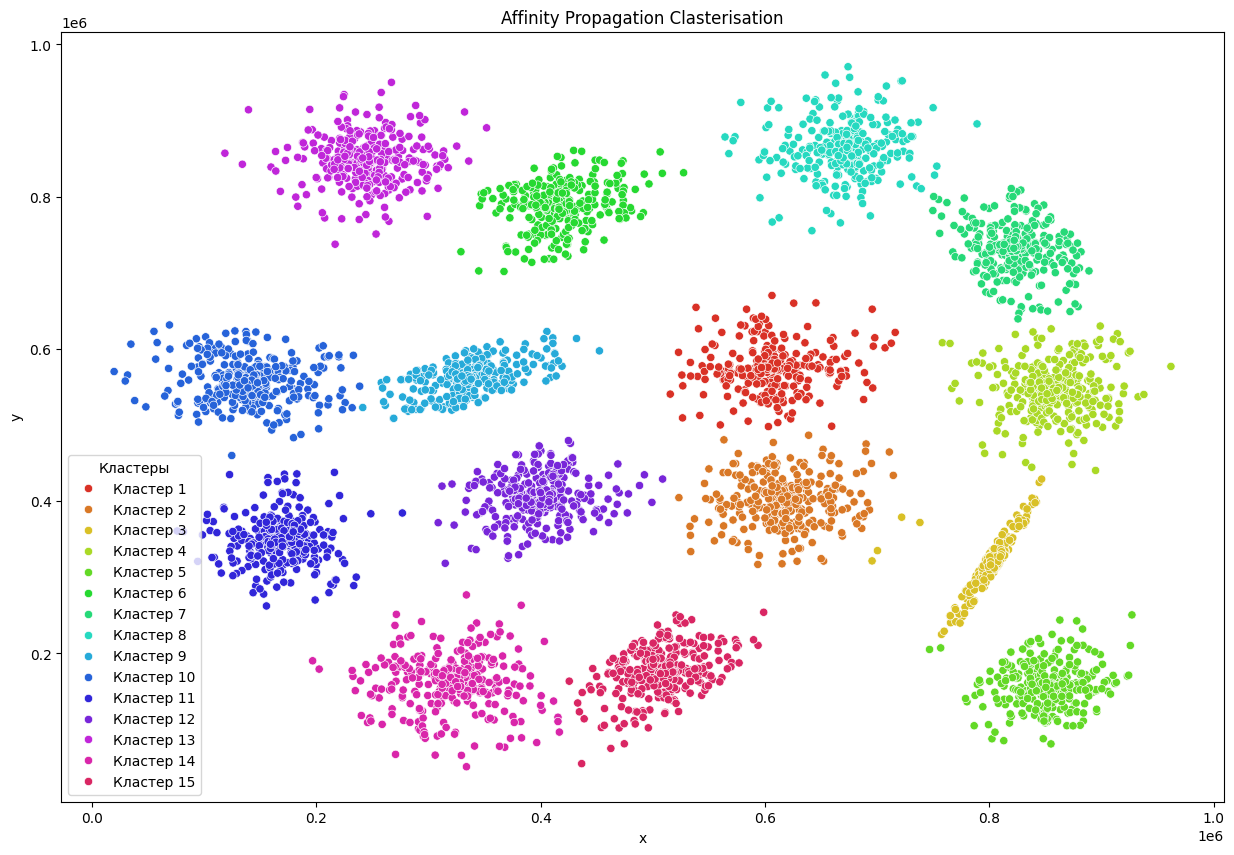

In [17]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="x", y="y", hue='Кластер ' + (df1['cluster'] + 1).astype(str), palette= sns.hls_palette(15, l=.5, s=.7), marker="o", data=df1)
# legend_points = [plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i+1}",
#                            markerfacecolor=sns.hls_palette(15, l=.5, s=.7)[i],
#                            markersize=10) for i in range(15)]
# plt.legend(handles=legend_points, loc='upper right', title="Cluster", ncol=3)
handles, labels = plt.gca().get_legend_handles_labels()

def sort_key(label):
    return int(label.split()[-1])

# Sort the labels
labels.sort(key=sort_key)

# Update the legend
plt.legend(handles, labels, title="Кластеры")
plt.title("Affinity Propagation Clasterisation")
plt.show()

In [9]:
X = file.copy() # assuming your data is a Pandas DataFrame

# Выполнение кластеризации методом MeanShift
bandwidth = 1.5  # Подберите параметр для получения большего количества кластеров
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift.fit(X)

# Получение меток кластеров от MeanShift
initial_labels = mean_shift.labels_
initial_cluster_centers = mean_shift.cluster_centers_

# Агломеративная кластеризация для уменьшения количества кластеров до 15
agglomerative = AgglomerativeClustering(n_clusters=15)
final_labels = agglomerative.fit_predict(initial_cluster_centers)

# Создание новой таблицы с уменьшенным количеством кластеров
df2 = X
df2['Initial Cluster'] = initial_labels
df2['cluster'] = final_labels[initial_labels]

# Вывод первых 10 строк таблицы
print(df2.head(10))

# Вывод количества уникальных кластеров
unique_clusters = np.unique(df2['cluster'])
print(f'Количество уникальных кластеров: {len(unique_clusters)}')

        x       y  Initial Cluster  cluster
0  664159  550946             1600       12
1  665845  557965             1587       12
2  597173  575538             2116       12
3  618600  551446             1878       12
4  635690  608046             1749       12
5  588100  557588             2173       12
6  582015  546191             2193       12
7  604678  574577             2035       12
8  572029  518313             2228       12
9  604737  574591             2033       12
Количество уникальных кластеров: 15


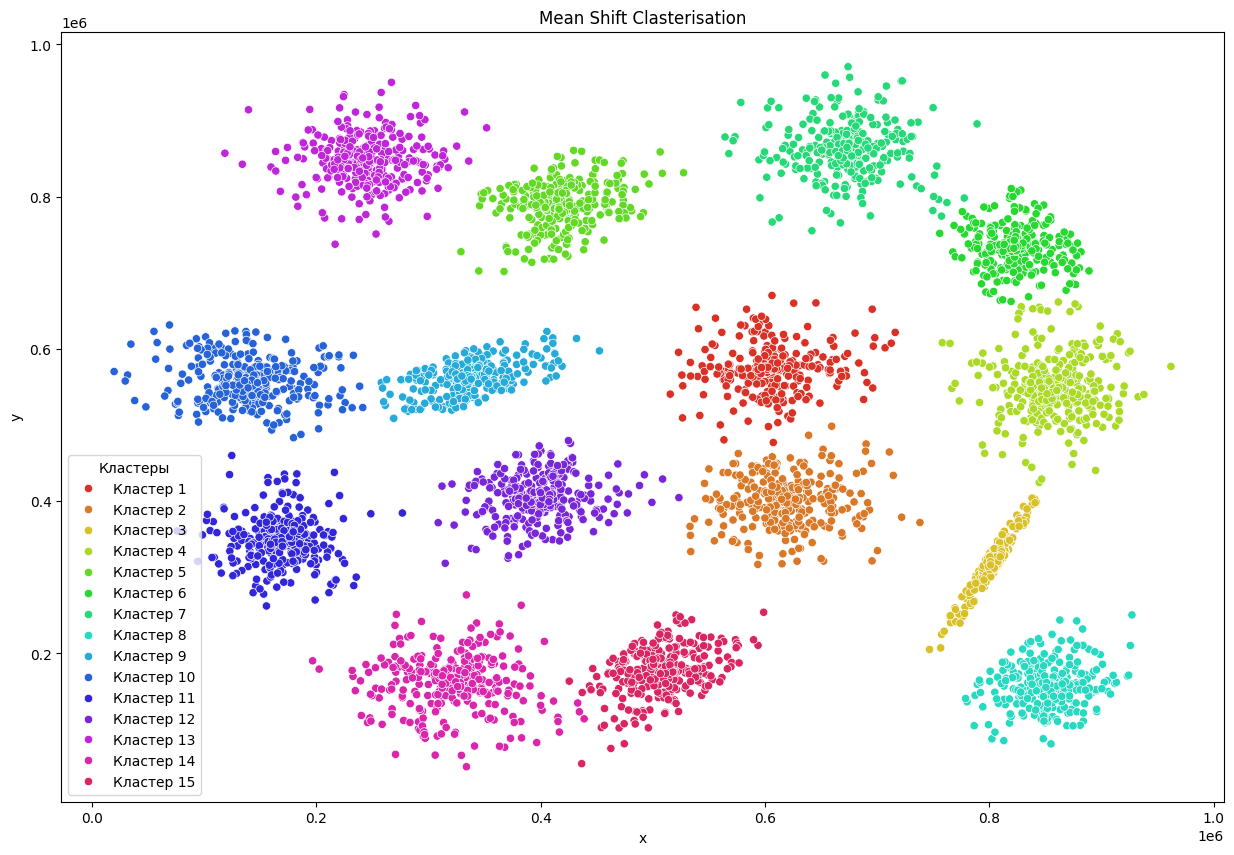

In [16]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="x", y="y", hue='Кластер ' + (df2['cluster'] + 1).astype(str), palette= sns.hls_palette(15, l=.5, s=.7), marker="o", data=df2)
# legend_points = [plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i+1}",
#                            markerfacecolor=sns.hls_palette(15, l=.5, s=.7)[i],
#                            markersize=10) for i in range(15)]
# plt.legend(handles=legend_points, loc='upper right', title="Cluster", ncol=3)

handles, labels = plt.gca().get_legend_handles_labels()

def sort_key(label):
    return int(label.split()[-1])

# Sort the labels
labels.sort(key=sort_key)

# Update the legend
plt.legend(handles, labels, title="Кластеры")
plt.title("Mean Shift Clasterisation")
plt.show()

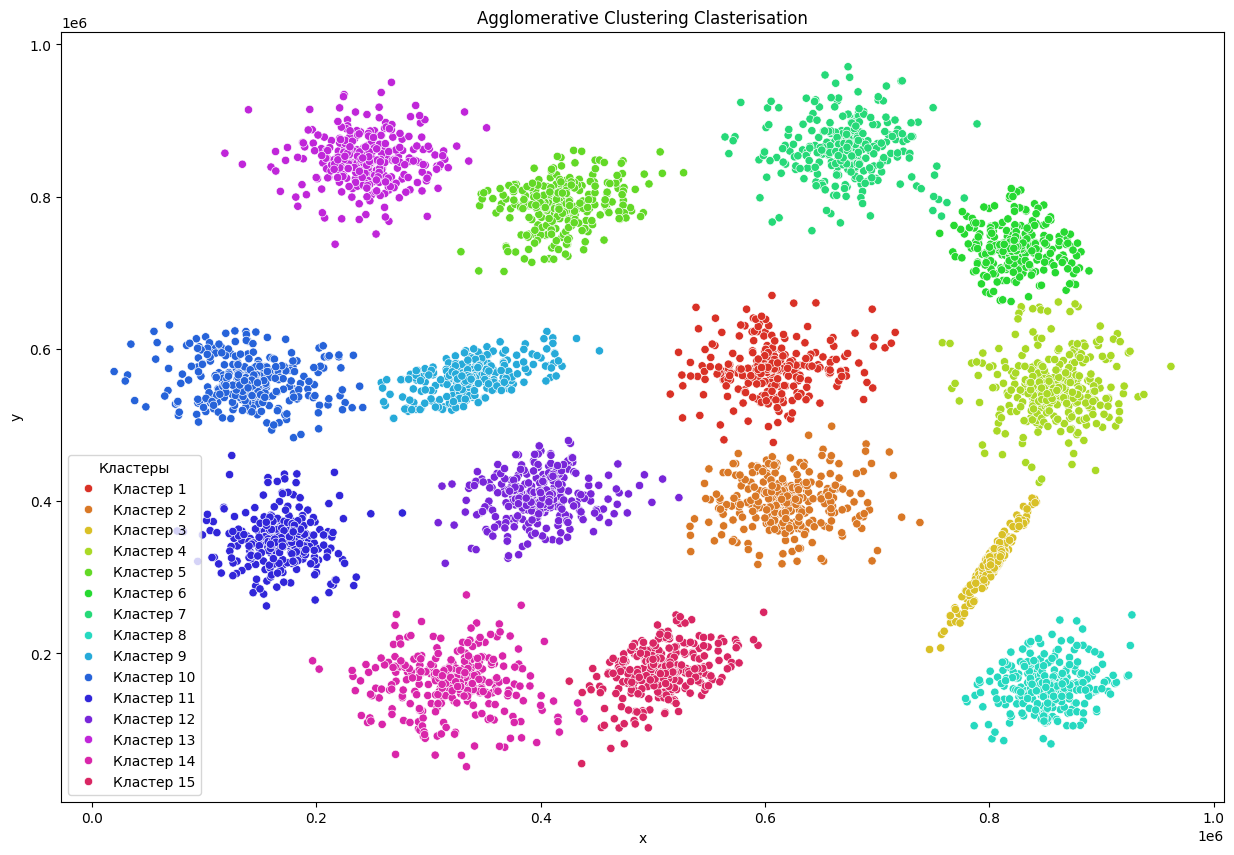

In [15]:
df3 = file.copy()
clustering = AgglomerativeClustering(n_clusters=15)

# Fit the model
clustering.fit(df3)
df3["cluster"] = clustering.labels_



plt.figure(figsize=(15, 10))
sns.scatterplot(x="x", y="y", hue='Кластер ' + (df3['cluster'] + 1).astype(str), palette= sns.hls_palette(15, l=.5, s=.7), marker="o", data=df3)
# legend_points = [plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i+1}",
#                            markerfacecolor=sns.hls_palette(15, l=.5, s=.7)[i],
#                            markersize=10) for i in range(15)]
# plt.legend(handles=legend_points, loc='upper right', title="Cluster", ncol=3)
handles, labels = plt.gca().get_legend_handles_labels()

def sort_key(label):
    return int(label.split()[-1])

# Sort the labels
labels.sort(key=sort_key)

# Update the legend
plt.legend(handles, labels, title="Кластеры")
plt.title("Agglomerative Clustering Clasterisation")
plt.show()

C:\Users\nikit\AppData\Local\Temp\ipykernel_19116\1147223885.py:13: UserWarning: The palette list has more values (17) than needed (16), which may not be intended.
  sns.scatterplot(x="x", y="y", hue=np.where(df4['cluster'] == -1, 'Выброс', 'Кластер ' + (df4['cluster'] + 1).astype(str)), palette= sns.hls_palette(17, l=.5, s=.7), marker="o", data=df4)


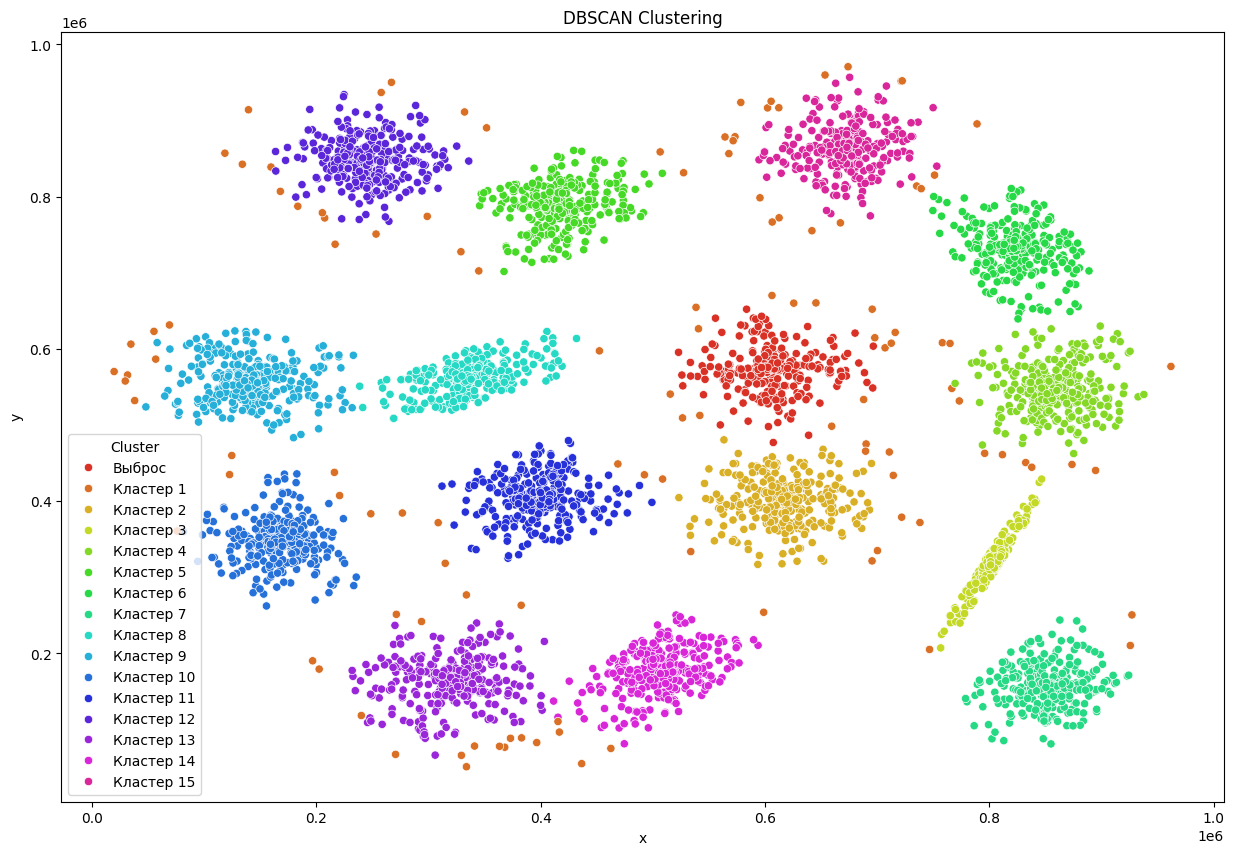

In [14]:
df4 = file.copy()

clustering = DBSCAN(eps=27000, min_samples=10)

# Fit the model
clustering.fit(df4)

# Get the cluster labels
df4["cluster"] = clustering.labels_

# Plot the clusters
plt.figure(figsize=(15, 10))
sns.scatterplot(x="x", y="y", hue=np.where(df4['cluster'] == -1, 'Выброс', 'Кластер ' + (df4['cluster'] + 1).astype(str)), palette= sns.hls_palette(17, l=.5, s=.7), marker="o", data=df4)

handles, labels = plt.gca().get_legend_handles_labels()

# Sort the labels
labels.sort(key=lambda x: int(x.split()[-1]) if x != 'Выброс' else -1)

# Update the legend
plt.legend(handles, labels, title="Cluster")
plt.title("DBSCAN Clustering")
plt.show()